In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1. Preprocessing

In [3]:
data = pd.read_csv("data/classificationdata.csv")
data.head()

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,HI,156,14.0,Yes,1.0,6.0,area_code_510,no,no,...,108,19.138302,208.349932,130,9.190181,8.015688,7,2.248902,7,no
1,1,MI,216,8.0,No,14.0,9.0,area_code_408,no,no,...,71,15.474436,228.902063,85,10.277852,9.683971,8,2.609739,3,no
2,2,NH,18,20.0,No,12.0,1.0,area_code_408,no,no,...,55,22.547297,202.353527,127,8.898488,14.039450,8,3.845776,2,no
3,3,MN,174,9.0,No,12.0,6.0,area_code_415,no,no,...,105,16.666506,214.487530,105,9.740333,13.031063,4,3.525823,1,no
4,4,TX,68,19.0,No,22.0,5.0,area_code_415,no,no,...,88,20.408969,190.047534,113,8.813303,6.760950,4,1.828652,0,no


In [7]:
train, test = train_test_split(data, test_size=0.3, random_state=1234)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12070 entries, 16692 to 1318
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             12070 non-null  int64  
 1   state_code                     12070 non-null  object 
 2   tenure                         12070 non-null  int64  
 3   contract_length                12041 non-null  float64
 4   promotions_offered             12041 non-null  object 
 5   remaining_term                 12041 non-null  float64
 6   last_nps_rating                12041 non-null  float64
 7   area_code                      12063 non-null  object 
 8   international_plan             12070 non-null  object 
 9   voice_mail_plan                12050 non-null  object 
 10  number_vmail_messages          12070 non-null  int64  
 11  total_day_minutes              12070 non-null  float64
 12  total_day_calls                12070 non-nu

In [9]:
train.isnull().sum()

id                                0
state_code                        0
tenure                            0
contract_length                  29
promotions_offered               29
remaining_term                   29
last_nps_rating                  29
area_code                         7
international_plan                0
voice_mail_plan                  20
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                12
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            29
dtype: int64

# Filling missing values

Can drop rows with missing values, but that is again loss of information, so create a baseline first without removing rows

## Area code - categorical

In [10]:
train[train["area_code"].isnull()]

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
17168,17168,WY,54,18.0,No,19.0,7.0,NaN,no,NaN,...,111,16.548064,193.086752,114,8.808353,9.344790,4,2.634894,0,no
4558,4558,WY,58,22.0,No,20.0,6.0,NaN,no,NaN,...,111,15.370818,185.992442,115,8.634951,9.258257,4,2.522559,0,no
13336,13336,RI,79,13.0,No,9.0,6.0,NaN,no,no,...,68,14.943610,162.052384,106,7.171747,13.576263,6,3.658442,1,no
5772,5772,MO,155,12.0,No,3.0,9.0,NaN,yes,no,...,98,8.018185,200.103367,96,9.318969,7.688405,7,1.940647,0,no
1642,1642,MO,154,15.0,No,2.0,7.0,NaN,yes,no,...,100,8.753738,198.839157,94,9.278937,7.073209,6,1.943637,0,no
16450,16450,FL,147,16.0,No,9.0,8.0,NaN,yes,no,...,93,20.838636,187.249514,66,8.307897,8.289207,5,2.255682,2,no
12972,12972,MO,153,24.0,No,13.0,6.0,NaN,yes,no,...,98,8.515226,207.015705,92,9.090795,7.466579,6,2.008288,0,no


In [11]:
# create new category "missing"
train["area_code"] = train["area_code"].fillna("missing")
train[train["area_code"]=="missing"]

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
17168,17168,WY,54,18.0,No,19.0,7.0,missing,no,NaN,...,111,16.548064,193.086752,114,8.808353,9.344790,4,2.634894,0,no
4558,4558,WY,58,22.0,No,20.0,6.0,missing,no,NaN,...,111,15.370818,185.992442,115,8.634951,9.258257,4,2.522559,0,no
13336,13336,RI,79,13.0,No,9.0,6.0,missing,no,no,...,68,14.943610,162.052384,106,7.171747,13.576263,6,3.658442,1,no
5772,5772,MO,155,12.0,No,3.0,9.0,missing,yes,no,...,98,8.018185,200.103367,96,9.318969,7.688405,7,1.940647,0,no
1642,1642,MO,154,15.0,No,2.0,7.0,missing,yes,no,...,100,8.753738,198.839157,94,9.278937,7.073209,6,1.943637,0,no
16450,16450,FL,147,16.0,No,9.0,8.0,missing,yes,no,...,93,20.838636,187.249514,66,8.307897,8.289207,5,2.255682,2,no
12972,12972,MO,153,24.0,No,13.0,6.0,missing,yes,no,...,98,8.515226,207.015705,92,9.090795,7.466579,6,2.008288,0,no


## Voice mail plan - categorical

In [12]:
train[train["voice_mail_plan"].isnull()]

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
16429,16429,HI,44,21.0,No,20.0,10.0,area_code_510,no,NaN,...,102,18.016167,187.208784,90,8.690546,11.481874,2,3.017702,1,no
10372,10372,HI,42,8.0,No,7.0,6.0,area_code_510,no,NaN,...,106,17.749234,185.584080,92,8.224325,11.041335,2,3.105547,1,no
11974,11974,MO,15,14.0,No,17.0,9.0,area_code_510,no,NaN,...,69,11.871465,145.341081,102,7.051341,8.259750,9,2.296696,1,no
3365,3365,MO,18,22.0,No,12.0,2.0,area_code_415,no,NaN,...,77,22.896967,178.095650,103,8.785522,6.028258,6,1.874301,0,no
17168,17168,WY,54,18.0,No,19.0,7.0,missing,no,NaN,...,111,16.548064,193.086752,114,8.808353,9.344790,4,2.634894,0,no
7767,7767,AZ,4,9.0,No,7.0,3.0,area_code_408,no,NaN,...,119,21.481234,281.874501,91,12.695069,11.408316,4,3.225750,1,yes
16037,16037,AZ,6,16.0,No,3.0,2.0,area_code_408,no,NaN,...,122,22.108010,288.967333,88,13.270796,11.430051,3,3.059472,1,yes
4558,4558,WY,58,22.0,No,20.0,6.0,missing,no,NaN,...,111,15.370818,185.992442,115,8.634951,9.258257,4,2.522559,0,no
8645,8645,MT,60,17.0,Yes,1.0,4.0,area_code_415,no,NaN,...,75,19.991544,180.150988,108,8.345667,9.549767,3,2.468519,1,yes
11005,11005,NH,82,15.0,Yes,4.0,2.0,area_code_408,no,NaN,...,97,16.923811,216.419971,88,9.603598,9.563044,4,2.667278,2,yes


In [13]:
train["voice_mail_plan"] = train["voice_mail_plan"].fillna("missing")
train[train["voice_mail_plan"]=="missing"]

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
16429,16429,HI,44,21.0,No,20.0,10.0,area_code_510,no,missing,...,102,18.016167,187.208784,90,8.690546,11.481874,2,3.017702,1,no
10372,10372,HI,42,8.0,No,7.0,6.0,area_code_510,no,missing,...,106,17.749234,185.584080,92,8.224325,11.041335,2,3.105547,1,no
11974,11974,MO,15,14.0,No,17.0,9.0,area_code_510,no,missing,...,69,11.871465,145.341081,102,7.051341,8.259750,9,2.296696,1,no
3365,3365,MO,18,22.0,No,12.0,2.0,area_code_415,no,missing,...,77,22.896967,178.095650,103,8.785522,6.028258,6,1.874301,0,no
17168,17168,WY,54,18.0,No,19.0,7.0,missing,no,missing,...,111,16.548064,193.086752,114,8.808353,9.344790,4,2.634894,0,no
7767,7767,AZ,4,9.0,No,7.0,3.0,area_code_408,no,missing,...,119,21.481234,281.874501,91,12.695069,11.408316,4,3.225750,1,yes
16037,16037,AZ,6,16.0,No,3.0,2.0,area_code_408,no,missing,...,122,22.108010,288.967333,88,13.270796,11.430051,3,3.059472,1,yes
4558,4558,WY,58,22.0,No,20.0,6.0,missing,no,missing,...,111,15.370818,185.992442,115,8.634951,9.258257,4,2.522559,0,no
8645,8645,MT,60,17.0,Yes,1.0,4.0,area_code_415,no,missing,...,75,19.991544,180.150988,108,8.345667,9.549767,3,2.468519,1,yes
11005,11005,NH,82,15.0,Yes,4.0,2.0,area_code_408,no,missing,...,97,16.923811,216.419971,88,9.603598,9.563044,4,2.667278,2,yes


## total_eve_minutes - numerical

In [14]:
train[train["total_eve_minutes"].isnull()][["total_eve_minutes", "churn"]]

,total_eve_minutes,churn
16142,NaN,no
17168,NaN,no
4558,NaN,no
11193,NaN,yes
15828,NaN,no
12703,NaN,yes
2729,NaN,no
11475,NaN,no
15905,NaN,no
1740,NaN,yes


1. Fill in missing values with average values
2. Create a separate missing flag

or can also take in the ratio of total eve charge to total eve minutes

In [15]:
mean_eve_mins = train["total_eve_minutes"].mean().round(2)
train["total_eve_minutes"] = train["total_eve_minutes"].fillna(mean_eve_mins)

train["total_eve_minutes_missing"] = train["total_eve_minutes"].isnull().astype(int)

In [16]:
train.head()

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_eve_minutes_missing
16692,16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,...,18.927987,217.002619,70,9.332900,8.308312,9,2.208759,2,no,0
6970,6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,...,16.126664,224.264014,89,10.263007,8.238645,2,2.168779,1,yes,0
9747,9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,...,20.911572,123.234534,87,5.731597,11.084169,5,3.153671,0,no,0
16099,16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,...,17.844030,215.835004,91,9.407576,19.981388,4,5.242569,0,no,0
8833,8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,...,12.536175,246.694873,130,10.800377,11.670808,9,3.205746,2,no,0


In [17]:
train.isnull().sum()

id                                0
state_code                        0
tenure                            0
contract_length                  29
promotions_offered               29
remaining_term                   29
last_nps_rating                  29
area_code                         0
international_plan                0
voice_mail_plan                   0
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                 0
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            29
total_eve_minutes_missing         0
dtype: int64

## Dealing with missing target values

5 columns have the same number of missing values. Check if they belong to the same rows

In [18]:
train[train["churn"].isnull()].isnull().sum()
# the rows match

id                                0
state_code                        0
tenure                            0
contract_length                  29
promotions_offered               29
remaining_term                   29
last_nps_rating                  29
area_code                         0
international_plan                0
voice_mail_plan                   0
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                 0
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            29
total_eve_minutes_missing         0
dtype: int64

In [19]:
train[train["churn"].isnull()][["contract_length", "promotions_offered", "remaining_term", "last_nps_rating", "churn"]]

,contract_length,promotions_offered,remaining_term,last_nps_rating,churn
16332,NaN,NaN,NaN,NaN,NaN
7783,NaN,NaN,NaN,NaN,NaN
5127,NaN,NaN,NaN,NaN,NaN
14246,NaN,NaN,NaN,NaN,NaN
1612,NaN,NaN,NaN,NaN,NaN
2332,NaN,NaN,NaN,NaN,NaN
3544,NaN,NaN,NaN,NaN,NaN
5704,NaN,NaN,NaN,NaN,NaN
12038,NaN,NaN,NaN,NaN,NaN
5544,NaN,NaN,NaN,NaN,NaN


In [20]:
# just drop these columns
train = train[~train["churn"].isnull()]
train.isnull().sum()

id                               0
state_code                       0
tenure                           0
contract_length                  0
promotions_offered               0
remaining_term                   0
last_nps_rating                  0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
total_eve_minutes_missing        0
dtype: int64

# Feature Engineering

## Ratio for correlated predictor variables

Use the ratio of highly correlated features and drop the original ones

In [21]:
train

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_eve_minutes_missing
16692,16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,...,18.927987,217.002619,70,9.332900,8.308312,9,2.208759,2,no,0
6970,6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,...,16.126664,224.264014,89,10.263007,8.238645,2,2.168779,1,yes,0
9747,9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,...,20.911572,123.234534,87,5.731597,11.084169,5,3.153671,0,no,0
16099,16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,...,17.844030,215.835004,91,9.407576,19.981388,4,5.242569,0,no,0
8833,8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,...,12.536175,246.694873,130,10.800377,11.670808,9,3.205746,2,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,1182,MO,108,15.0,No,6.0,2.0,area_code_415,no,yes,...,16.537779,235.390600,117,10.564099,4.545567,5,1.288634,2,no,0
8222,8222,MS,145,10.0,No,5.0,6.0,area_code_510,no,no,...,16.510144,177.148800,88,7.970189,10.761491,5,2.836673,1,no,0
8471,8471,OH,165,15.0,No,16.0,10.0,area_code_510,no,no,...,18.274905,198.142324,125,9.672272,8.795677,9,2.190617,1,no,0
17048,17048,PA,151,18.0,No,3.0,9.0,area_code_415,no,no,...,17.824783,231.717911,88,9.817061,10.535620,5,2.762639,2,no,0


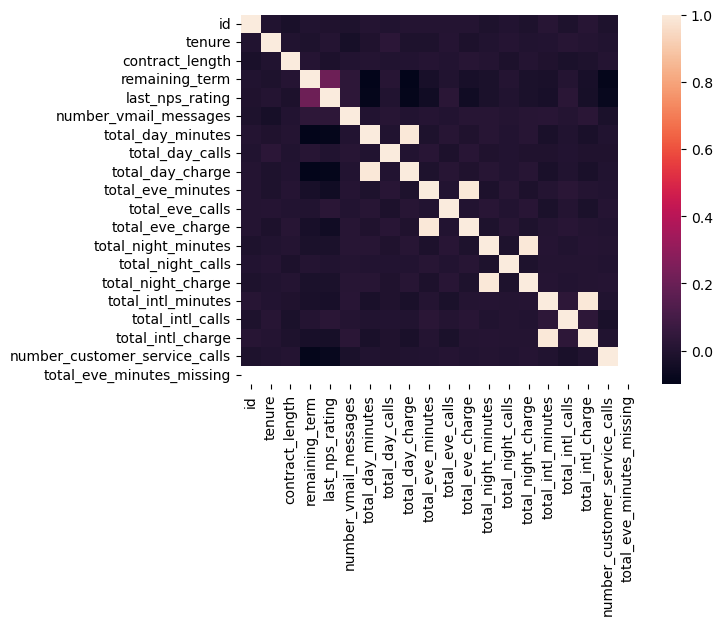

In [22]:
# seeing correlations among features
sns.heatmap(train.select_dtypes(exclude="object").corr());

Correlated features: charge and minutes. Hence create new features dividing the charge by the minutes.

In [23]:
# create ratios
train["day_ratio"] = train["total_day_charge"] / train["total_day_minutes"]
train["eve_ratio"] = train["total_eve_charge"] / train["total_eve_minutes"]
train["night_ratio"] = train["total_night_charge"] / train["total_night_minutes"]
train["intl_ratio"] = train["total_intl_charge"] / train["total_intl_minutes"]

In [24]:
train.head()

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_eve_minutes_missing,day_ratio,eve_ratio,night_ratio,intl_ratio
16692,16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,...,8.308312,9,2.208759,2,no,0,0.172815,0.083632,0.043008,0.265849
6970,6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,...,8.238645,2,2.168779,1,yes,0,0.169215,0.084485,0.045763,0.263245
9747,9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,...,11.084169,5,3.153671,0,no,0,0.158396,0.088938,0.046510,0.284520
16099,16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,...,19.981388,4,5.242569,0,no,0,0.178475,0.086951,0.043587,0.262373
8833,8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,...,11.670808,9,3.205746,2,no,0,0.168656,0.081817,0.043780,0.274681


In [25]:
train.drop(["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge",
           "total_day_minutes", "total_eve_minutes", "total_night_minutes", "total_intl_minutes"],
          axis=1, inplace=True)

In [26]:
train.head()

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,churn,total_eve_minutes_missing,day_ratio,eve_ratio,night_ratio,intl_ratio
16692,16692,TN,100,18.0,No,23.0,9.0,area_code_510,no,no,...,139,70,9,2,no,0,0.172815,0.083632,0.043008,0.265849
6970,6970,DE,92,15.0,No,7.0,7.0,area_code_510,no,no,...,124,89,2,1,yes,0,0.169215,0.084485,0.045763,0.263245
9747,9747,AZ,62,10.0,No,18.0,10.0,area_code_415,no,yes,...,109,87,5,0,no,0,0.158396,0.088938,0.046510,0.284520
16099,16099,KY,143,12.0,No,12.0,6.0,area_code_408,no,no,...,91,91,4,0,no,0,0.178475,0.086951,0.043587,0.262373
8833,8833,HI,123,19.0,No,23.0,7.0,area_code_510,no,no,...,103,130,9,2,no,0,0.168656,0.081817,0.043780,0.274681


## Skewed customer service calls

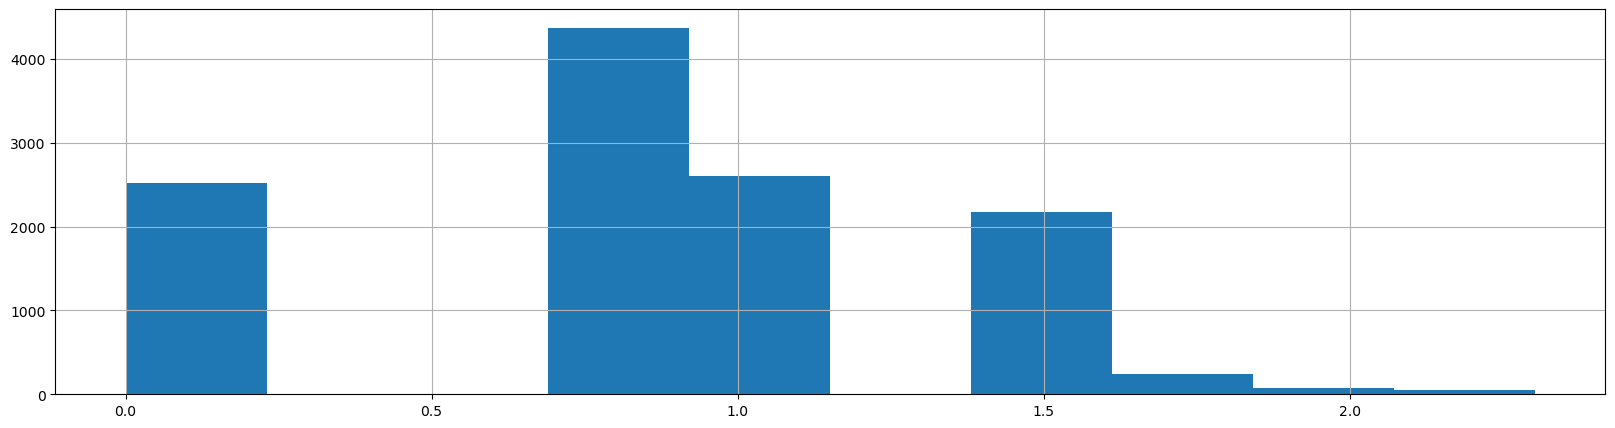

In [27]:
train["number_customer_service_calls"] = np.log(train["number_customer_service_calls"]+1)
train["number_customer_service_calls"].hist(figsize=(20, 5));

## A new feature for unhappy customers

Using the relationship between nps_rating, remaning_term and promotions_offered

In [28]:
# fixing mislabelled data
train["promotions_offered"] = train["promotions_offered"].replace(["NO", np.NaN], "No")

In [29]:
# nps < 7, remaining term < 5 and no promotions offered
# AND of all these cnostraints
train["unhappy_customers"] = ((train.remaining_term < 5)
                              & (train.last_nps_rating <= 7)
                              & (train.promotions_offered  == "No")).astype(int)

In [30]:
train[train["unhappy_customers"]==1].head()

,id,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,...,total_night_calls,total_intl_calls,number_customer_service_calls,churn,total_eve_minutes_missing,day_ratio,eve_ratio,night_ratio,intl_ratio,unhappy_customers
3584,3584,NM,182,10.0,No,3.0,3.0,area_code_408,no,yes,...,118,1,1.386294,no,0,0.169449,0.087521,0.045246,0.274974,1
17212,17212,OK,103,23.0,No,4.0,2.0,area_code_415,no,no,...,89,16,0.693147,yes,0,0.169476,0.084495,0.045747,0.258265,1
2321,2321,MT,100,22.0,No,2.0,7.0,area_code_415,no,no,...,81,4,0.693147,no,0,0.171099,0.083300,0.044048,0.267411,1
15834,15834,WA,58,23.0,No,2.0,3.0,area_code_408,no,no,...,142,8,0.000000,yes,0,0.171940,0.089352,0.047560,0.274232,1
8608,8608,IN,67,9.0,No,2.0,4.0,area_code_510,no,no,...,99,6,1.098612,yes,0,0.175524,0.084723,0.043051,0.246410,1


## Create Target and Feature Variables

Convert categorical columns to one-hot encoded format

In [31]:
# split data into X and y variables
X_train = train.drop("churn", axis=1)
y_train = np.where(train["churn"]=="yes", 1, 0)

In [32]:
"churn" in list(X_train.columns)

False

In [33]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [34]:
# one hot encode all other categorical features
onehot = OneHotEncoder(handle_unknown="ignore")
encoded_columns = onehot.fit_transform(X_train.select_dtypes(include="object")).toarray()

In [35]:
encoded_columns.shape

(12041, 62)

In [36]:
onehot.get_feature_names_out()

array(['state_code_AK', 'state_code_AL', 'state_code_AR', 'state_code_AZ',
       'state_code_CA', 'state_code_CO', 'state_code_CT', 'state_code_DC',
       'state_code_DE', 'state_code_FL', 'state_code_GA', 'state_code_HI',
       'state_code_IA', 'state_code_ID', 'state_code_IL', 'state_code_IN',
       'state_code_KS', 'state_code_KY', 'state_code_LA', 'state_code_MA',
       'state_code_MD', 'state_code_ME', 'state_code_MI', 'state_code_MN',
       'state_code_MO', 'state_code_MS', 'state_code_MT', 'state_code_NC',
       'state_code_ND', 'state_code_NE', 'state_code_NH', 'state_code_NJ',
       'state_code_NM', 'state_code_NV', 'state_code_NY', 'state_code_OH',
       'state_code_OK', 'state_code_OR', 'state_code_PA', 'state_code_RI',
       'state_code_SC', 'state_code_SD', 'state_code_TN', 'state_code_TX',
       'state_code_UT', 'state_code_VA', 'state_code_VT', 'state_code_WA',
       'state_code_WI', 'state_code_WV', 'state_code_WY',
       'promotions_offered_No', 'promotion

In [37]:
# drop all categorical features
X_train = X_train.select_dtypes(exclude="object")

# assigning encoded columns to column names
X_train[onehot.get_feature_names_out()] = encoded_columns

In [38]:
X_train.head()

,id,tenure,contract_length,remaining_term,last_nps_rating,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,...,promotions_offered_Yes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,area_code_missing,international_plan_no,international_plan_yes,voice_mail_plan_missing,voice_mail_plan_no,voice_mail_plan_yes
16692,16692,100,18.0,23.0,9.0,2,80,139,70,9,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6970,6970,92,15.0,7.0,7.0,0,106,124,89,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
9747,9747,62,10.0,18.0,10.0,20,127,109,87,5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
16099,16099,143,12.0,12.0,6.0,1,120,91,91,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8833,8833,123,19.0,23.0,7.0,0,105,103,130,9,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
X_train.columns

Index(['id', 'tenure', 'contract_length', 'remaining_term', 'last_nps_rating',
       'number_vmail_messages', 'total_day_calls', 'total_eve_calls',
       'total_night_calls', 'total_intl_calls',
       'number_customer_service_calls', 'total_eve_minutes_missing',
       'day_ratio', 'eve_ratio', 'night_ratio', 'intl_ratio',
       'unhappy_customers', 'state_code_AK', 'state_code_AL', 'state_code_AR',
       'state_code_AZ', 'state_code_CA', 'state_code_CO', 'state_code_CT',
       'state_code_DC', 'state_code_DE', 'state_code_FL', 'state_code_GA',
       'state_code_HI', 'state_code_IA', 'state_code_ID', 'state_code_IL',
       'state_code_IN', 'state_code_KS', 'state_code_KY', 'state_code_LA',
       'state_code_MA', 'state_code_MD', 'state_code_ME', 'state_code_MI',
       'state_code_MN', 'state_code_MO', 'state_code_MS', 'state_code_MT',
       'state_code_NC', 'state_code_ND', 'state_code_NE', 'state_code_NH',
       'state_code_NJ', 'state_code_NM', 'state_code_NV', 'state_cod

## Dealing with imbalanced classes

In [40]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [41]:
sm = SMOTE(random_state = 1234)
X_train, y_train = sm.fit_resample(X_train, y_train)

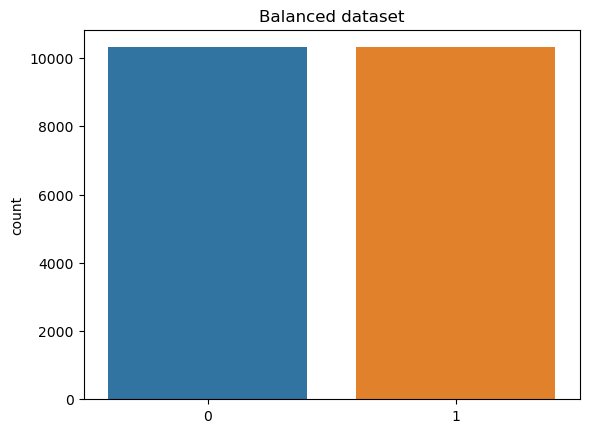

In [42]:
sns.countplot(x=y_train).set_title("Balanced dataset");

# 2. Modelling

In [43]:
# import pipeline dependencies
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [44]:
# import algorithms
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [45]:
# building pipeline
pipelines = {
    "sgd": make_pipeline(StandardScaler(), SGDClassifier()),
    "ridge": make_pipeline(StandardScaler(), RidgeClassifier()),
    "rf": make_pipeline(StandardScaler(), RandomForestClassifier()),
    "gb": make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    "xg": make_pipeline(StandardScaler(), XGBClassifier()),
}

In [46]:
# one set of grids for each classifier
grid = {
    "sgd":{
        "sgdclassifier__alpha":[0.00001, 0.0001, 0.001, 0.01]
    },
    "ridge":{
         "ridgeclassifier__alpha":[0.01, 0.5, 1.0, 2.0, 3.0]
    },
    "rf":{
        "randomforestclassifier__n_estimators": [50, 100, 200, 300],
        "randomforestclassifier__max_depth": [None, 5, 7, 9]
    },
    "gb":{
        "gradientboostingclassifier__n_estimators":[50, 100, 200, 300],
        "gradientboostingclassifier__max_depth":[None, 3,5, 7, 9]
    },
    "xg":{
        "xgbclassifier__n_estimators":[50, 100, 200, 300],
        "xgbclassifier__max_depth":[None, 3,5, 7, 9]
    }
}

## Train models

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print(algo)
        model = GridSearchCV(pipeline, grid[algo], cv=10)
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print(f"Completed training for {algo}")
    except Exception as e:
        print(f"There was an error training the {algo} model: {e}")

sgd
Completed training for sgd
ridge
Completed training for ridge
rf
Completed training for rf
gb
Completed training for gb
xg
Completed training for xg


# 3. Evaluation

In [47]:
fit_models

{'sgd': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('sgdclassifier', SGDClassifier())]),
              param_grid={'sgdclassifier__alpha': [1e-05, 0.0001, 0.001, 0.01]}),
 'ridge': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('ridgeclassifier', RidgeClassifier())]),
              param_grid={'ridgeclassifier__alpha': [0.01, 0.5, 1.0, 2.0, 3.0]}),
 'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('randomforestclassifier',
                                         RandomForestClassifier())]),
              param_grid={'randomforestclassifier__max_depth': [None, 5, 7, 9],
                          'randomforestclassifier__n_estimators': [50, 100, 200,
                                                           

# Model Evauation

In [47]:
# create our own preprocessing pipeline
# apply same transformations to test data
col_order = X_train.columns; col_order

Index(['id', 'tenure', 'contract_length', 'remaining_term', 'last_nps_rating',
       'number_vmail_messages', 'total_day_calls', 'total_eve_calls',
       'total_night_calls', 'total_intl_calls',
       'number_customer_service_calls', 'total_eve_minutes_missing',
       'day_ratio', 'eve_ratio', 'night_ratio', 'intl_ratio',
       'unhappy_customers', 'state_code_AK', 'state_code_AL', 'state_code_AR',
       'state_code_AZ', 'state_code_CA', 'state_code_CO', 'state_code_CT',
       'state_code_DC', 'state_code_DE', 'state_code_FL', 'state_code_GA',
       'state_code_HI', 'state_code_IA', 'state_code_ID', 'state_code_IL',
       'state_code_IN', 'state_code_KS', 'state_code_KY', 'state_code_LA',
       'state_code_MA', 'state_code_MD', 'state_code_ME', 'state_code_MI',
       'state_code_MN', 'state_code_MO', 'state_code_MS', 'state_code_MT',
       'state_code_NC', 'state_code_ND', 'state_code_NE', 'state_code_NH',
       'state_code_NJ', 'state_code_NM', 'state_code_NV', 'state_cod

In [48]:
# template function to transform data
def transform_data(test_df, col_order, mean_eve_mins, onehot):
    # Copy dataframe
    X = test_df.copy()
    
    # DP - Handle Missing Values
    X['area_code'] =  X['area_code'].fillna('missing')
    X['voice_mail_plan'] = X['voice_mail_plan'].fillna('missing')
    X['total_eve_minutes_missing'] = X['total_eve_minutes'].isnull().astype(int)
    X['total_eve_minutes'] = X['total_eve_minutes'].fillna(mean_eve_mins)
    
    # FE - Ratios
    X['day_ratio'] = X['total_day_charge'] / X['total_day_minutes']
    X['eve_ratio'] = X['total_eve_charge'] / X['total_eve_minutes']
    X['night_ratio'] = X['total_night_charge'] / X['total_night_minutes']
    X['intl_ratio'] = X['total_intl_charge'] / X['total_intl_minutes']
    X = X.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','total_day_minutes','total_eve_minutes','total_night_minutes', 'total_intl_minutes'], axis=1)
    
    # FE - Log Transform
    X['number_customer_service_calls'] = np.log(X['number_customer_service_calls']+1)
    
    # FE - Unhappy Customers 
    X['promotions_offered'] = X['promotions_offered'].replace(['NO', np.NaN], 'No')
    X['unhappy_customers'] = ((X.remaining_term < 5) 
                              & (X.last_nps_rating <=7) 
                              & (X.promotions_offered == 'No')).astype(int)
    
    # Fit existing onehot encoder 
    encoded_columns = onehot.transform(X.select_dtypes(include='object')).toarray()
    X = X.select_dtypes(exclude='object')
    X[onehot.get_feature_names_out()] = encoded_columns
    
    return X[col_order]

In [49]:
# dropping test data with null target values
test = test[~test["churn"].isnull()]
test.isnull().sum()

id                                0
state_code                        0
tenure                            0
contract_length                   0
promotions_offered                0
remaining_term                    0
last_nps_rating                   0
area_code                         5
international_plan                0
voice_mail_plan                  10
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                 6
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                             0
dtype: int64

In [77]:
# applying pipeline to test data
X_test = transform_data(test.drop("churn", axis=1), col_order, mean_eve_mins, onehot)

In [81]:
# getting y_test
y_test = np.where(test["churn"]=="yes", 1, 0)
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
# import evaluation metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [83]:
# Loop through the models and print metrics
for algo, model in fit_models.items(): 
    yhat = model.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    recall = recall_score(y_test, yhat)
    print(f'{algo} model scores Accuracy:{accuracy}, Precision:{precision}, Recall:{recall}') 

sgd model scores Accuracy:0.8919495635305529, Precision:0.5767946577629383, Recall:0.9325236167341431
ridge model scores Accuracy:0.8630455868089234, Precision:0.5125448028673835, Recall:0.9649122807017544
rf model scores Accuracy:0.9483996120271581, Precision:0.8096479791395046, Recall:0.8380566801619433
gb model scores Accuracy:0.9536372453928225, Precision:0.8346666666666667, Recall:0.844804318488529
xg model scores Accuracy:0.9549951503394762, Precision:0.8539638386648123, Recall:0.8286099865047234


In [84]:
# using xg model as the best performing one
model = fit_models["xg"]
yhat = model.predict(X_test)

In [85]:
yhat[:50]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0])

In [87]:
# confusion matrics
confusion_matrix(y_test, yhat, labels=[1, 0])

array([[ 614,  127],
       [ 105, 4309]])

In [88]:
# looking at predictions along with true values
res = pd.DataFrame([y_test, yhat])
res = res.T
res.columns = ['ytrue','ypred']

In [90]:
res.head(10)

,ytrue,ypred
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [93]:
# can do error analysis on misclassified samples
X_test.iloc[5]

id                         13546.0
tenure                       125.0
contract_length               16.0
remaining_term                 7.0
last_nps_rating                2.0
                            ...   
international_plan_no          1.0
international_plan_yes         0.0
voice_mail_plan_missing        0.0
voice_mail_plan_no             0.0
voice_mail_plan_yes            1.0
Name: 13546, Length: 79, dtype: float64

# Save models and encoder

In [58]:
import os
import pickle

In [63]:
# Create file paths 
SAVE_PATH = "models/"
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [97]:
# Save machine learning models 
for algo, model in fit_models.items(): 
    FILE_PATH = os.path.join(SAVE_PATH, f'{algo}.pkl')
    with open(FILE_PATH, 'wb') as f: 
        pickle.dump(model, f) 

In [98]:
# save one hot encoder
ENCODER_FILE_PATH = os.path.join(SAVE_PATH, 'encoder.pkl')
with open(ENCODER_FILE_PATH, 'wb') as f: 
    pickle.dump(onehot, f) 

# Create model schema

define inputs, transformed inputs, etc (use these for web app)

In [4]:
# extract required values based on column type
def extract_column_values(col, df): 
    if df[col].dtype == 'O': 
        return list(df[col].unique())
    elif df[col].dtype == 'int64': 
        return (int(df[col].min()), int(df[col].max()))
    elif df[col].dtype == 'float64': 
        return (float(df[col].min()),float(df[col].max()))
    else: 
        return list(df[col].unique().astype(str))

In [50]:
column_info = {col:{'dtype':str(data[col].dtype), 'values':extract_column_values(col, data)} for col in data.columns}

In [51]:
column_info

{'id': {'dtype': 'int64', 'values': (0, 17242)},
 'state_code': {'dtype': 'object',
  'values': ['HI',
   'MI',
   'NH',
   'MN',
   'TX',
   'WY',
   'IN',
   'IL',
   'TN',
   'MA',
   'DC',
   'NV',
   'PA',
   'AK',
   'NM',
   'WI',
   'ND',
   'NJ',
   'AR',
   'NE',
   'NY',
   'OK',
   'SD',
   'KY',
   'ID',
   'VT',
   'IA',
   'MT',
   'AL',
   'MS',
   'ME',
   'WV',
   'RI',
   'VA',
   'OH',
   'SC',
   'MD',
   'CO',
   'AZ',
   'NC',
   'CT',
   'MO',
   'UT',
   'DE',
   'WA',
   'KS',
   'CA',
   'FL',
   'LA',
   'GA',
   'OR']},
 'tenure': {'dtype': 'int64', 'values': (1, 242)},
 'contract_length': {'dtype': 'float64', 'values': (8.0, 24.0)},
 'promotions_offered': {'dtype': 'object', 'values': ['Yes', 'No', 'NO', nan]},
 'remaining_term': {'dtype': 'float64', 'values': (1.0, 24.0)},
 'last_nps_rating': {'dtype': 'float64', 'values': (1.0, 10.0)},
 'area_code': {'dtype': 'object',
  'values': ['area_code_510', 'area_code_408', 'area_code_415', nan]},
 'international

In [52]:
transformed_cols = {'transformed_columns':X_train.columns.to_list()}
schema = {'column_info':column_info, 'transformed_columns':transformed_cols}

In [53]:
transformed_cols

{'transformed_columns': ['id',
  'tenure',
  'contract_length',
  'remaining_term',
  'last_nps_rating',
  'number_vmail_messages',
  'total_day_calls',
  'total_eve_calls',
  'total_night_calls',
  'total_intl_calls',
  'number_customer_service_calls',
  'total_eve_minutes_missing',
  'day_ratio',
  'eve_ratio',
  'night_ratio',
  'intl_ratio',
  'unhappy_customers',
  'state_code_AK',
  'state_code_AL',
  'state_code_AR',
  'state_code_AZ',
  'state_code_CA',
  'state_code_CO',
  'state_code_CT',
  'state_code_DC',
  'state_code_DE',
  'state_code_FL',
  'state_code_GA',
  'state_code_HI',
  'state_code_IA',
  'state_code_ID',
  'state_code_IL',
  'state_code_IN',
  'state_code_KS',
  'state_code_KY',
  'state_code_LA',
  'state_code_MA',
  'state_code_MD',
  'state_code_ME',
  'state_code_MI',
  'state_code_MN',
  'state_code_MO',
  'state_code_MS',
  'state_code_MT',
  'state_code_NC',
  'state_code_ND',
  'state_code_NE',
  'state_code_NH',
  'state_code_NJ',
  'state_code_NM',
  

In [55]:
os.makedirs('app')

In [56]:
import json
with open(os.path.join('app', 'schema.json'), 'w') as f: 
    json.dump(schema, f) 

# Test Scoring

## Load models and encoder

In [64]:
# load model
with open(os.path.join(SAVE_PATH, "xg.pkl"), "rb") as f:
    model = pickle.load(f)

In [66]:
# load encoder
with open(os.path.join(SAVE_PATH, "encoder.pkl"), "rb") as f:
    onehot = pickle.load(f)

In [68]:
# load schema
with open(os.path.join("app", "schema.json"), "rb") as f:
    schema = json.load(f)

## Transform test samples and predict

In [70]:
# data from app will be in the form of a dict
# example data with some inconsistencies to test preprocessing pipeline
res = {
  "state_code": "OH",
  "area_code": "area_code_415",
  "international_plan": "no",
  "voice_mail_plan": "yes",
  "number_vmail_messages": "26",
  "total_day_minutes": 161.6,
  "total_day_calls": 123,
  "total_day_charge": 27.47,
  "total_eve_minutes": 195.5,
  "total_eve_calls": 103,
  "total_eve_charge": 16.62,
  "total_night_minutes": 254.4,
  "total_night_calls": 103,
  "total_night_charge": 11.45,
  "total_intl_minutes": 13.7,
  "total_intl_calls": 3,
  "total_intl_charge": 3.7,
  "promotions_offered":"No", 
  "number_customer_service_calls": 5.0, 
  "tenure":4, 
  "contract_length":5,
  "remaining_term":10, 
  "last_nps_rating":10
}

In [78]:
# use schema to get input and output column order
column_order_in = list(schema["column_info"].keys())[1:-1]
column_order_out = list(schema["transformed_columns"]["transformed_columns"])

In [80]:
# convert res to dict and transform
scoring_data = pd.Series(res).to_frame().T
scoring_data = scoring_data[column_order_in]

In [86]:
# check dtypes bef passing to preprocessing
for column, column_properties in schema["column_info"].items():
    if column != "churn" and column!= "id":
        dtype = column_properties["dtype"]
        scoring_data[column] = scoring_data[column].astype(dtype)

In [92]:
# scoring_data["id"] = 0
# scoring_data
scoring_sample = transform_data(scoring_data, column_order_out, mean_eve_mins, onehot)
scoring_sample

,id,tenure,contract_length,remaining_term,last_nps_rating,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,...,promotions_offered_Yes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,area_code_missing,international_plan_no,international_plan_yes,voice_mail_plan_missing,voice_mail_plan_no,voice_mail_plan_yes
0,0,4,5.0,10.0,10.0,26,123,103,103,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [97]:
model.predict(scoring_sample)

array([0])